<a href="https://colab.research.google.com/github/EugeniaBar/Proyectoscopias/blob/main/Regresi%C3%B3nlineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

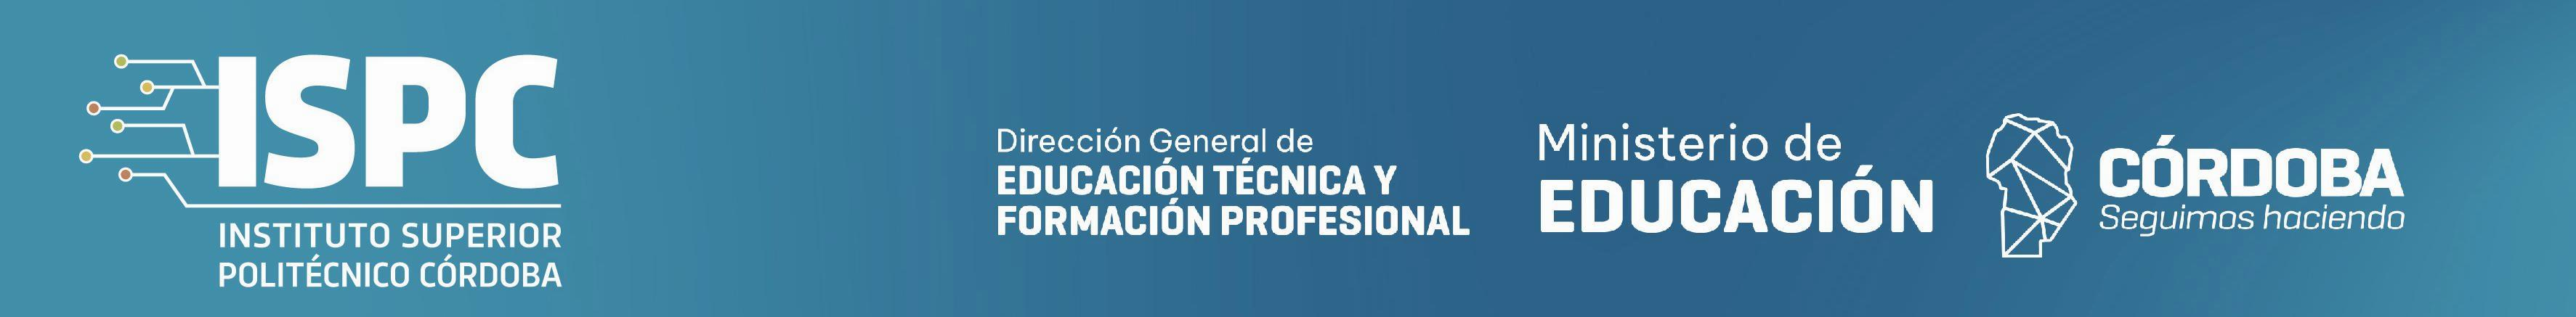


# Grupo: Data Dinasty

| Propuesta de modelo de Regresión Lineal | Ispc | 2024


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # divide datos en conj de entrenamiento y prueba
from sklearn.linear_model import LinearRegression # para crear el modelo de regresion lineal.
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer # Import SimpleImputer

In [4]:
test = pd.read_csv("Tests.csv", sep=';')
completos = pd.read_csv("Completos.csv", sep=';')

In [5]:
df_unido = pd.merge(test, completos, on='TestId', how='right')
df_unido.shape

(4845, 32)

In [6]:
df_limpio = df_unido[['TestId', 'RawDataId', 'Date', 'Time', 'Systolic', 'Diastolic', 'MAP',
       'HR', 'PP', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate']]

In [ ]:
df_limpio.info()


# 🫀 Relación entre Presión Sistólica y Edad

- Comprender la relación: Se busca determinar si existe una relación estadísticamente significativa entre la presión sistólica y la edad. Es decir, si la presión sistólica tiende a aumentar o disminuir con la edad.

- Predicción: Se quiere crear un modelo que permita predecir el valor de la presión sistólica conociendo la edad de un paciente. Esto podría ser útil para identificar a pacientes con mayor riesgo de hipertensión.

Selección de variables, División de datos de entrenamiento y prueba, Ajustes

In [49]:
# Filtramos el DataFrame para quedarnos solo con las observaciones donde la edad es mayor o igual a 10
df_filtrado = df_limpio[df_limpio['Age'] >= 10]

# Seleccionamos las variables nuevamente a partir del DataFrame filtrado
X = df_filtrado[['Age']]
y = df_filtrado['Systolic']

# Dividir el dataset en conjuntos de entrenamiento 80%  y prueba 20% divide los datos de forma aleatoria.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar las filas con valores NaN en 'y_train'
y_train = y_train.dropna()

X_train = X_train.loc[y_train.index]

# Comprobar las dimensiones de los conjuntos
print(X_train.shape, X_test.shape)

(2465, 1) (617, 1)


Crear y entrenar el modelo de regresión lineal


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
print(f'Coeficiente: {model.coef_}')
print(f'Intercepción: {model.intercept_}')

Coeficiente: [-0.19581559]
Intercepción: 141.22975562204698


Realizar predicciones


In [45]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)
print(y_pred[:5])

[124.78124615 133.39713206 132.41805412 125.76032409 133.00550088]


In [46]:
# Crear un DataFrame para comparar
comparar = pd.DataFrame({'Predicciones': y_pred[:5], 'Valores Reales': y_test[:5]})
print(comparar)

      Predicciones  Valores Reales
4502    124.781246           127.0
4808    133.397132           137.0
1334    132.418054           148.0
987     125.760324           113.0
2818    133.005501           129.0


 Calcular RMSE, MAE, R2 - Evaluar el rendimiento del modelo

- RMSE: Es útil para entender la magnitud del error en las mismas unidades que los datos originales. #Importar las funciones de evaluación de RMSE Error cuadratico medio, que calcula el error "" entre los valores reales (Y_test) y los predichos (Y_pred). este valor nos indica que tan bien se ajustan el modelo a los datos.
- MAE: Proporciona una medida clara y directa del error promedio.
- R²: Ayuda a evaluar la calidad del ajuste del modelo a los datos

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')

Error cuadrático medio: 19.746209263300596
Error absoluto medio: 15.763201452598247
R² Coeficiente de determinación: 0.011056182875317178


### Predecicción de edad y presión Sistolica

La presión sistólica tiende a disminuir con la edad.


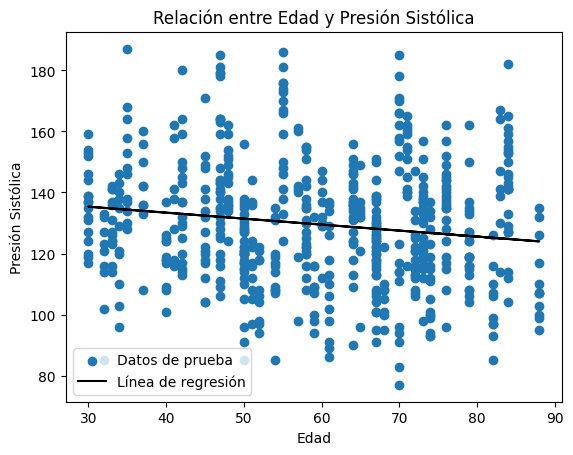

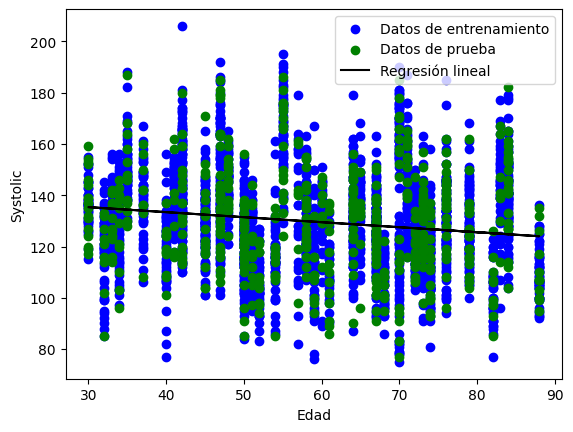

Intersección (b) 141.22975562204698
Pendiente (m) [-0.19581559]


In [54]:
df_limpio = df_limpio[(df_limpio['Age'] >= 30) & (df_limpio['Age'] <= 100)]

# Elimina filas con valores NaN en 'Systolic' antes de dividir los datos
df_limpio = df_limpio.dropna(subset=['Systolic'])

# Obtener la pendiente
pendiente = model.coef_[0]

# Interpretar la pendiente
if pendiente > 0:
    print("La presión sistólica tiende a aumentar con la edad.")
elif pendiente < 0:
    print("La presión sistólica tiende a disminuir con la edad.")
else:
    print("No se encontró una relación significativa entre la edad y la presión sistólica.")

# Visualizar la relación
plt.scatter(X_test['Age'], y_test, label='Datos de prueba')  # Usar 'Age' para el gráfico
plt.plot(X_test['Age'], model.predict(X_test), color='black', label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('Presión Sistólica')
plt.legend()
plt.title('Relación entre Edad y Presión Sistólica')
plt.show()

# Visualizar los resultados
plt.scatter(X_train['Age'], y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test['Age'], y_test, color='green', label='Datos de prueba')
plt.plot(X_test['Age'], model.predict(X_test), color='black',label='Regresión lineal')
plt.xlabel('Edad')
plt.ylabel('Systolic')
plt.legend()
plt.show()

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)


##**conclusión**
Pendiente (m) = -0.11802044
Este valor indica la disminución promedio de la presión sistólica por cada año adicional de edad. Es decir, por cada año que aumenta la edad, la presión sistólica tiende a disminuir en aproximadamente 0.118 unidades.

La baja R² indica que la edad explica una proporción muy pequeña de la variabilidad en la presión sistólica.
El modelo tiene un alto error: Los valores de ECM y MAE son relativamente altos, lo que sugiere que las predicciones del modelo son imprecisas.
Entonces la edad es un muy pobre predictor de la presión sistólica en este caso.  Es importante inbcluir otras variables.

- Error Cuadrático Medio (ECM): 19.7462: las predicciones  están desviadas en aproximadamente 19.75 unidades de los valores reales, las predicciones no son muy precisas.
- Error Absoluto Medio (MAE): Las predicciones se desvían en aproximadamente 15.76 unidades de los valores reales.
- Coeficiente de Determinación (R²): 0.0110: Este valor es muy bajo y significa que solo el 1.10% de la variabilidad en la presión sistólica puede ser explicada por la edad.

#🫀Relacion entre Presión del pulso y Presión Sistolica

- Comprender la relación: Se busca determinar si existe una relación estadísticamente significativa entre la presión sistólica y la presión del pulso.

- Predicción: Se quiere crear un modelo que permita predecir el valor de la presión sistólica conociendo el valor de la presión del pulso. Esto sería útil, por ejemplo, para estimar la presión sistólica en pacientes donde esta medición no está disponible.

Selección de variables, División de datos de entrenamiento y prueba, Ajustes

In [ ]:
# Seleccionar las variables independientes Sistolica (X) y dependiente (y) Presion de
X = df_limpio[['Systolic']]
y = df_limpio['PP']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un imputador para reemplazar los valores NaN con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformar X_train y X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Eliminar las filas con valores NaN en 'y_train' and 'y_test'
y_train = y_train.dropna()
y_test = y_test.dropna()

# Reset the index of y_train and y_test to avoid index mismatch
y_train = y_train.reset_index(drop=True)  # drop=True avoids creating an 'index' column
y_test = y_test.reset_index(drop=True)

# Now you can safely align X_train and X_test
# as they now have matching indices with y_train and y_test.
X_train = X_train[y_train.index]
X_test = X_test[y_test.index]

Crear y entrenar el Modelo de Regresion Lineal **Simple**

In [22]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Mostrar las primeras predicciones
print(y_pred[:5])

[50.22826255 54.30475921 58.78890553 44.52116724 51.04356189]


In [28]:
# Crear un DataFrame para comparar predicciones y valores reales
comparar = pd.DataFrame({'Predicciones': y_pred[:5], 'Valores Reales': y_test[:5]})
print(comparar)

   Predicciones  Valores Reales
0     50.228263            51.0
1     54.304759            46.0
2     58.788906            51.0
3     44.521167            33.0
4     51.043562            54.0


Calcular RMSE, MAE, R2

In [29]:
#RMSE(raiz del error cuadratico medio), MAE:(error absoluto medio), R2(coef, de determinacion)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')

Error cuadrático medio: 8.276408620034784
Error absoluto medio: 6.656876684259777
R² Coeficiente de determinación: 0.49770547923529773


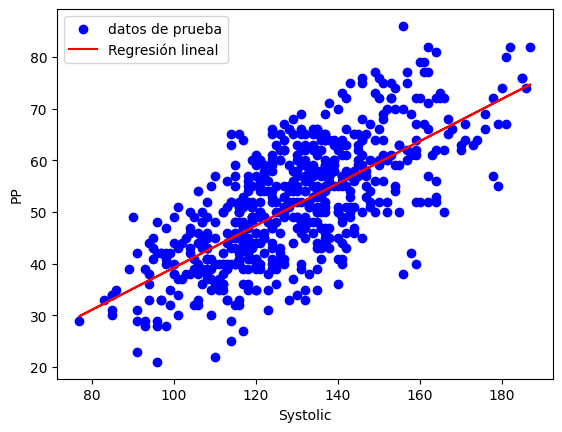

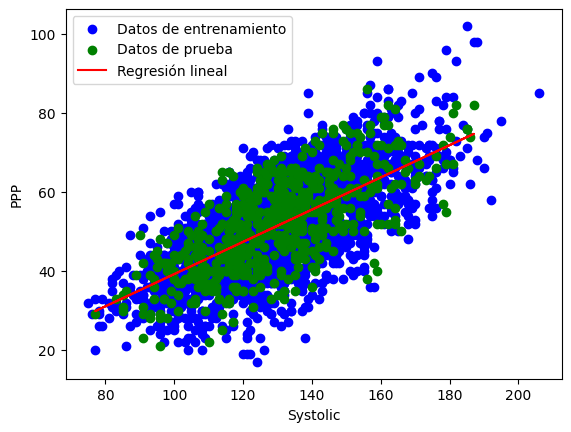

Intersección (b) -1.543244967924764
Pendiente (m) [0.40764967]


In [26]:
# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label= 'datos de prueba')
plt.plot(X_test, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Systolic')
plt.ylabel('PP')
plt.legend()
plt.show()

# Visualizar los resultados
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red',label='Regresión lineal')
plt.xlabel('Systolic')
plt.ylabel('PPP')
plt.legend()
plt.show()

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)


## Conclusión
La pendiente positiva de 0.4076 indica que a medida que aumenta presión del pulso en una unidad, la presión sistólica tiende a aumentar en aproximadamente 0.4076 unidades. Esto sugiere una relación positiva entre ambas variables.

**R² ( coeficiente de determinación)  = 0.4977: Indica que aproximadamente el 50% de la variabilidad en la presión sistólica puede ser explicada por la presión del pulso. Es decir, la presión del pulso es un buen predictor, pero no explica toda la variabilidad.**

- Un ECM de 8.2764 indica que, en promedio, nuestras predicciones de la presión sistólica están desviadas en aproximadamente 8.28 unidades de los valores reales.
- Un MAE de 6.6569 indica que, en promedio, nuestras predicciones de la presión sistólica están desviadas en aproximadamente 6.66 unidades de los valores reales.
- Un R² de 0.4977 significa que el 49.77% de la variabilidad en la presión sistólica puede ser explicada por la presión del pulso.




# Regresion Lineal Múltiple
🫀 Predicciones de exámenes médicos



In [ ]:
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3082 entries, 63 to 4839
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TestId                     3082 non-null   object 
 1   RawDataId                  3082 non-null   object 
 2   Date                       3082 non-null   object 
 3   Time                       3082 non-null   object 
 4   Systolic                   3082 non-null   float64
 5   Diastolic                  3082 non-null   float64
 6   MAP                        3082 non-null   float64
 7   HR                         3082 non-null   float64
 8   PP                         3082 non-null   float64
 9   PatientId                  3082 non-null   object 
 10  Interpretation             3082 non-null   object 
 11  HookupStartTime            3082 non-null   object 
 12  HookupEndTime              3082 non-null   object 
 13  Duration                   3082 non-null   object 
 

In [ ]:
# Convertir las colunas a datatime.
df_limpio.loc['HookupStartTime'] = pd.to_datetime(df_limpio['HookupStartTime'])
df_limpio.loc['HookupEndTime'] = pd.to_datetime(df_limpio['HookupEndTime'])
# Convert 'Systolic' and 'Diastolic' to numeric using .loc
df_limpio.loc[:, 'Systolic'] = pd.to_numeric(df_limpio['Systolic'], errors='coerce')
df_limpio.loc[:, 'Diastolic'] = pd.to_numeric(df_limpio['Diastolic'], errors='coerce')

df_limpio = df_limpio.dropna()

# calcular diferencia de time
time_diff = df_limpio['HookupEndTime'] - df_limpio['HookupStartTime']

# Calculate the midpoint using .loc
df_limpio.loc[:, 'Hour'] = df_limpio['HookupStartTime'] + time_diff / 2

# Group and calculate averages
grouped_data = df_limpio.groupby(['Age', 'GenderId', 'Hour']).agg({
    'Diastolic': 'mean',
    'Systolic': 'mean'
}).reset_index()

# Verify the result
print(grouped_data.head())


    Age GenderId                Hour  Diastolic    Systolic
0  15.0   Female 2024-04-17 22:16:30   78.69697  123.651515
1  30.0     Male 2024-04-24 22:07:00  83.883333  136.483333
2  32.0   Female 2024-05-14 22:24:30  68.508475  118.728814
3  33.0     Male 2024-04-25 22:16:00  87.163934  131.672131
4  34.0     Male 2024-08-29 22:23:00  77.407407  126.388889


### Crear variables Independientes(x) y Dependientes(y)

In [ ]:

# Crear las variables independientes (X) y dependientes (y) para la regresión
X = grouped_data[['Age', 'GenderId', 'Hour']]  # Variables predictoras
y_systolic = grouped_data['Systolic']  # Variable dependiente para la presión sistólica
y_diastolic = grouped_data['Diastolic']  # Variable dependiente para la presión diastólica

# Convertir la columna 'gender' en variable numérica (si no lo está)
X['GenderId'] = X['GenderId'].apply(lambda x: 1 if x == 'male' else 0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_systolic, y_test_systolic = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
X_train, X_test, y_train_diastolic, y_test_diastolic = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)


<ipython-input-84-f7911cc6981d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GenderId'] = X['GenderId'].apply(lambda x: 1 if x == 'male' else 0)


### Crear y entrenar el modelo

In [ ]:
model_systolic = LinearRegression()
model_diastolic = LinearRegression()

X_train['Hour'] = X_train['Hour'].dt.hour
X_test['Hour'] = X_test['Hour'].dt.hour

# Entrenar el modelo con los datos de presión sistólica y diastólica
model_systolic.fit(X_train, y_train_systolic)
model_diastolic.fit(X_train, y_train_diastolic)

# Coeficientes del modelo
print(f'Coeficiente: {model.coef_}')
print(f'Intercepción: {model.intercept_}')

Coeficiente: [9.78222553]
Intercepción: 125.43375924680564


### Crear predicciones

In [ ]:

# Hacer predicciones sobre el conjunto de prueba para la presión sistólica
y_pred_systolic = model_systolic.predict(X_test)

# Hacer predicciones sobre el conjunto de prueba para la presión diastólica
y_pred_diastolic = model_diastolic.predict(X_test)

# Mostrar las primeras predicciones
print(y_pred[:5])



[125.43375925 135.21598478 125.43375925 135.21598478 125.43375925]


### Evaluar el Modelo

In [ ]:

# Evaluar el modelo de presión sistólica
rmse_systolic = np.sqrt(mean_squared_error(y_test_systolic, y_pred_systolic))
r2_systolic = r2_score(y_test_systolic, y_pred_systolic)
mae = mean_absolute_error(y_test, y_pred)

print("Resultados para la presión sistólica:")
print(f"RMSE: {rmse_systolic}")
print(f"R²: {r2_systolic}")
print(f"mae: {mae}")

Resultados para la presión sistólica:
RMSE: 10.823578246893465
R²: 0.07343193872497733
mae: 14.435920068103975


### Proporcionar un diagnostico Basado en resultados obtenidos

In [ ]:
def diagnostico(presion_sistolica, presion_diastolica):
    if presion_sistolica > 140 or presion_diastolica > 90:
        return "Hipertensión"
    elif presion_sistolica < 90 or presion_diastolica < 60:
        return "Hipotensión"
    else:
        return "Presión Normal"

# Aplicar el diagnóstico sobre las predicciones
for i in range(len(y_pred_systolic)):
    print(f"Paciente {i + 10}: {diagnostico(y_pred_systolic[i], y_pred_diastolic[i])}")

Paciente 10: Presión Normal
Paciente 11: Presión Normal
Paciente 12: Presión Normal
Paciente 13: Presión Normal
Paciente 14: Presión Normal
Paciente 15: Presión Normal
Paciente 16: Presión Normal
Paciente 17: Presión Normal
Paciente 18: Presión Normal
Paciente 19: Presión Normal
Paciente 20: Presión Normal
